This report explains the theoretical steps involved in stereo dense reconstruction along with practical understanding gained during implementation.

Contribution:   
Shubodh - Q1   
Udit - Q2

* Some directions to use Code:
    * The current code does the OpenCV implementation of 3D reprojection and registers 3 point clouds. You can run the code as it is to see how it performs for 3 point clouds.
    * If you want to view just 1 point cloud (or first 'n' point clouds), just change the value of 'sample_size' to 1 or n. (Line 109)
    * To see custom implementation of 3D reprojection (along with the OpenCV one), uncomment the lines 148 - 153 and 159.
    * To see registration of all the 21 point clouds, uncomment lines 110 and 136 and comment lines 111 and 142.
    * To view disparity map, uncomment lines 113 and 114.


## Step 1: Finding Correspondences
The first step in dense stereo reconstruction is to find features in the left and right images and find their correspondences using algorithms like SIFT/SURF.

## Step 2: Calculating Disparity
Once the correspondences are found, we can then use geometry to find the disparity as explained as follows:

Points 'B' and 'C' below are corresponding points obtained from Step 1.

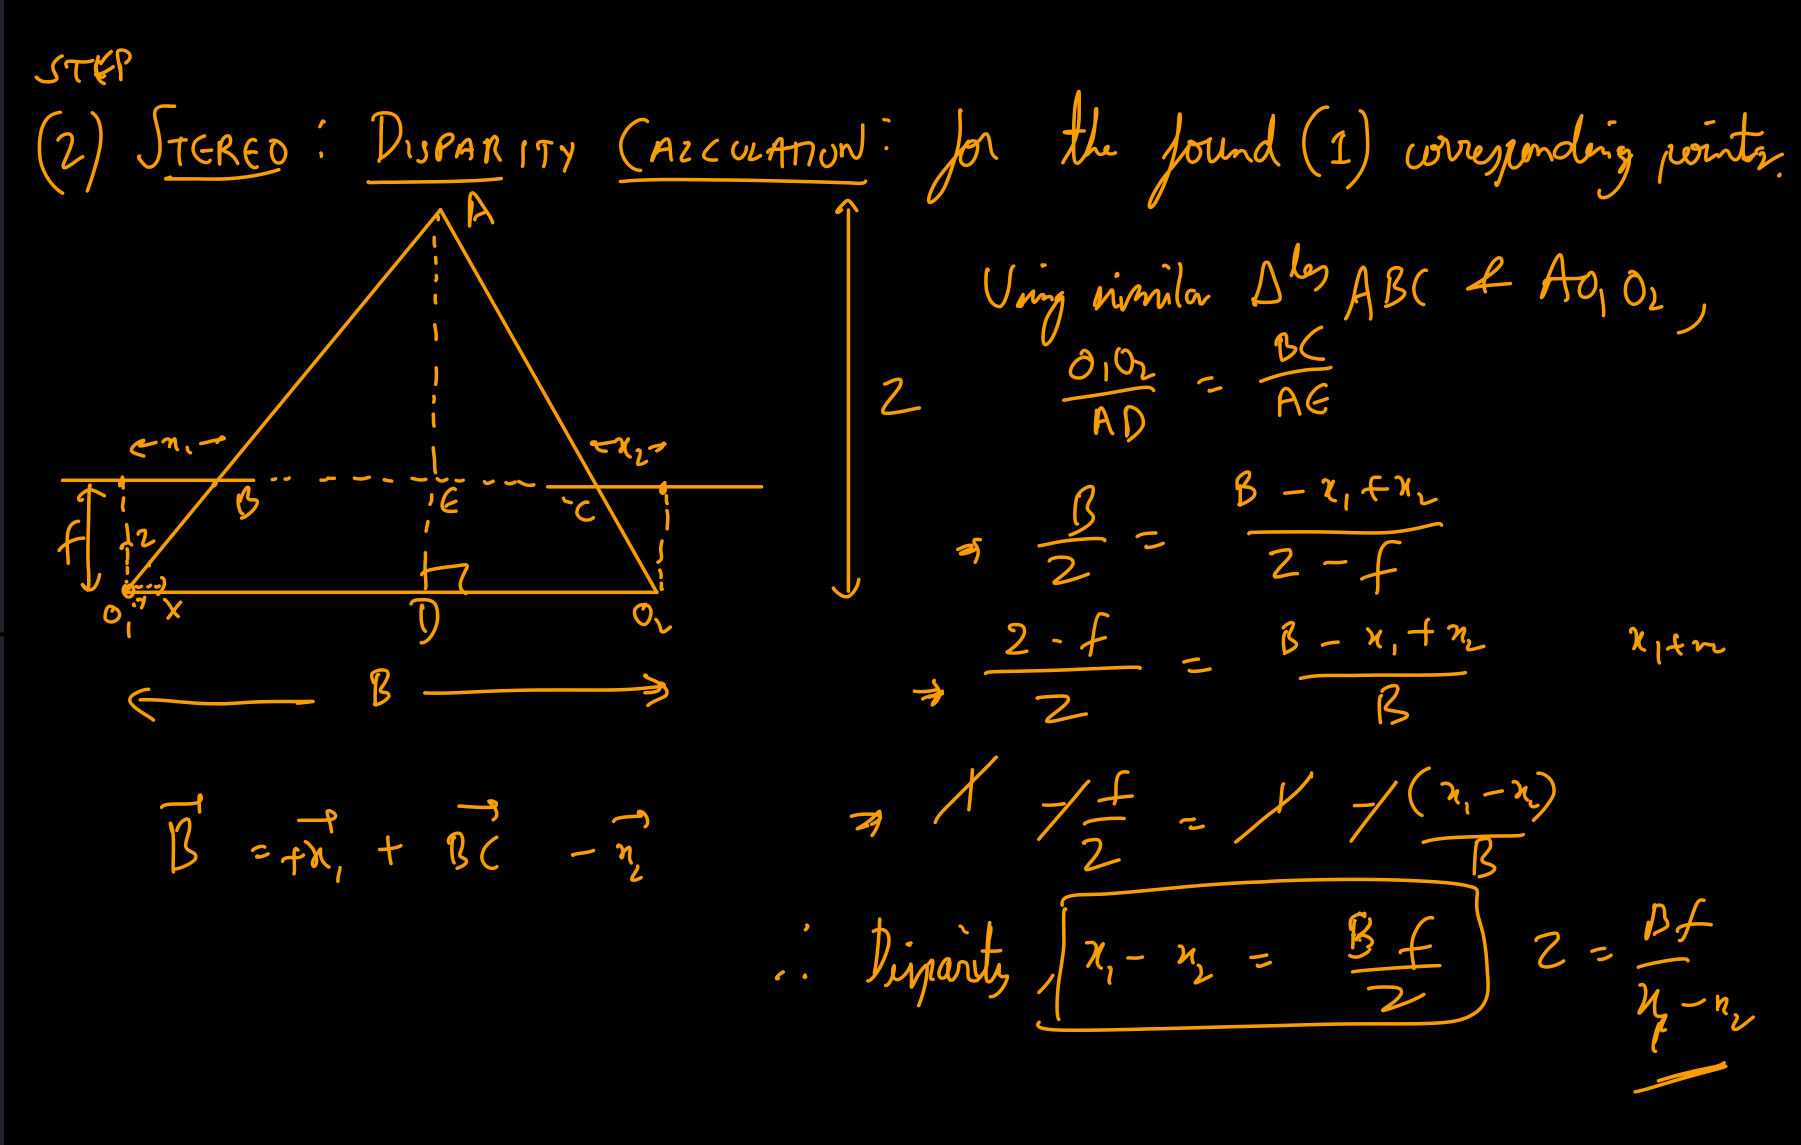

The above two steps are handled by the OpenCV function ```cv2.StereoSGBM_create``` in the function ```disparity(left_img, right_img)```. The function returns the disparity values.  

Parameter tuning needed to be done in order to obtain smooth and accurate disparity map. Firstly, the minimum possible disparity value ```minDisparity``` was decreased from 16 to -1 as there were many holes in the disparity map in the road region. Increasing the number of disparities parameter ```numDisparities``` from 32 to 64 made the disparity map much denser. Increasing the P2 and P1 parameters made the disparity more smoother. Changing other parameters like ```uniquenessRatio``` and ```speckleRange``` has not made much change so they were left at default values. The final parameters are as follows:

```
minDisparity = -1,
numDisparities = 64,
blockSize = 5,
window_size=5
P1 = 8*3*window_size**2,
P2 = 16*3*window_size**2,
disp12MaxDiff = -1, 
uniquenessRatio = 10, 
speckleWindowSize = 5,
speckleRange = 5 
```

The final disparity map obtained for first pair of images with above parameters is as follows:

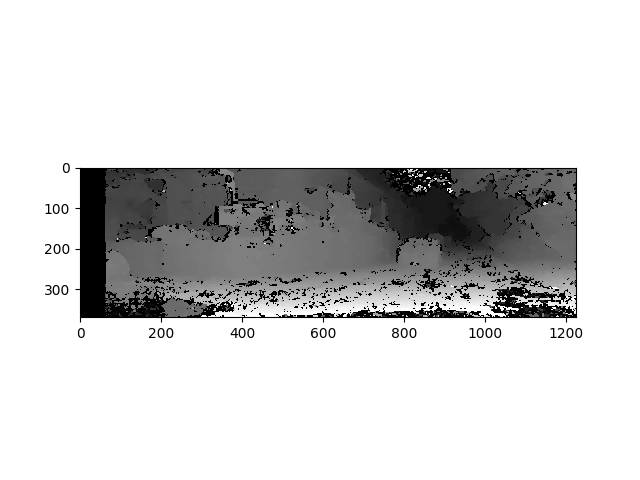

## Step 3: Calculating 3D World Points

We will first explain our custom code for this step and then about OpenCV's.

Calculating XYZ i.e. world points with respect to left image's camera center from disparity map. This is done by the function ```XYZfromDisparity(disparity_values, baseline_distance, K_matrix, left_image)```.

We first find the Depth values, i.e., Z (which is already with respect to left image's camera center) using the above formulation. We then use the (inverse of) camera equation to find remaining world coordinates X, Y given image coordinates x and camera calibration matrix K as follows:

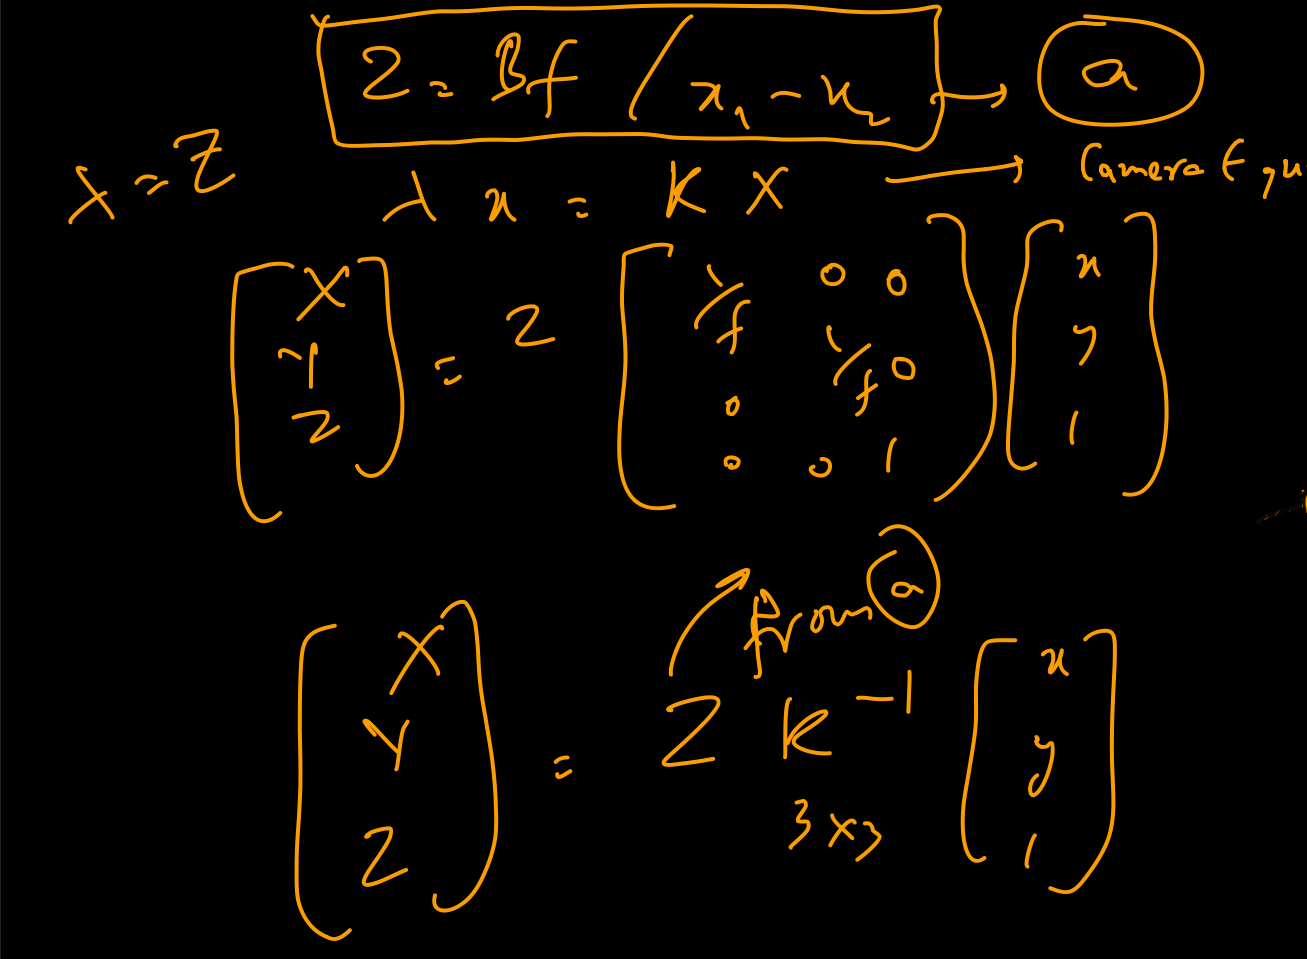

Note: In the code, the image of size `m x n` has been flattened to size `mn x 1`. This has been done because every pixel becomes an independent 3D point in the space. The function ```custom_pcd``` then takes the points along with colours as input, makes apoint cloud and writes the point cloud to a `.ply` file.

However, the above custom implementation doesn't work well. To see this implementation (along with the below OpenCV one), uncomment the lines 153 - 158 and 164. 

At this moment, we have obtained a single 3D point cloud. The first set of point clouds is as follows:

OpenCV's implementation (Single point cloud):
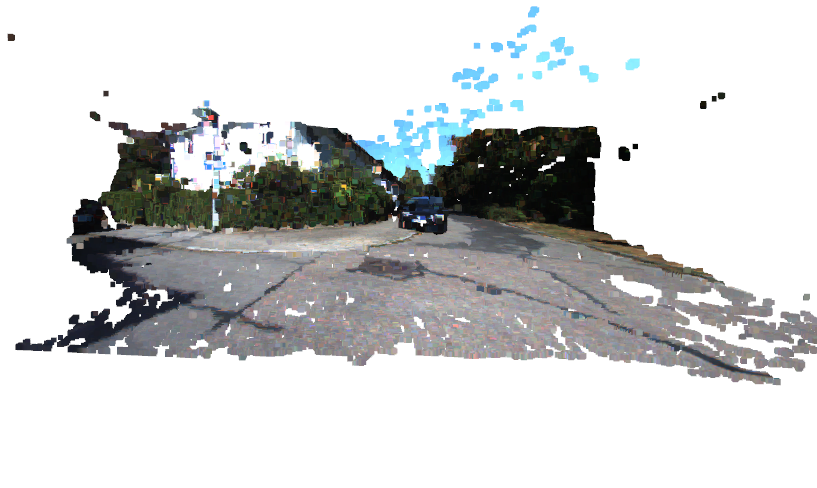
Custom implementation (Single point cloud):
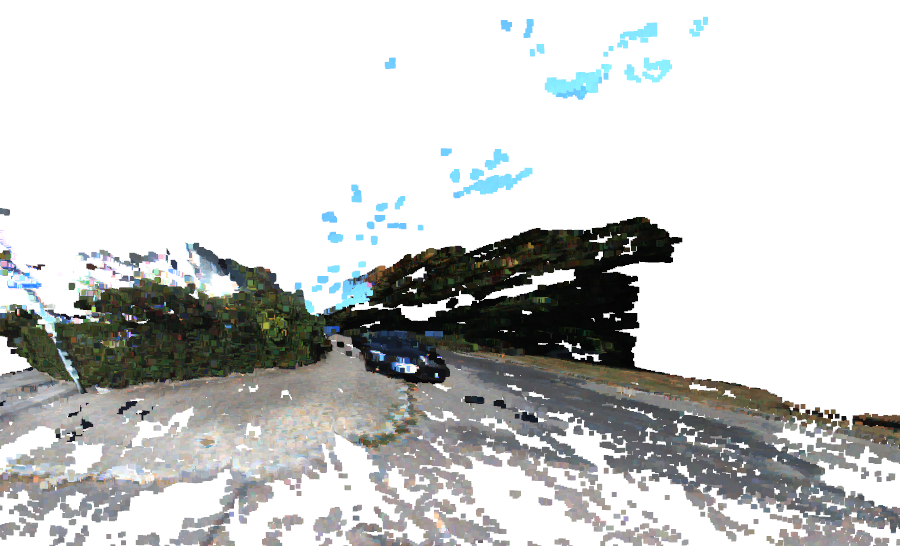

## Step 4: Registration of all 21 point clouds

This is done in the last ```for loop``` in the code. The 3D points that we get above are in camera frame, so we need to transform them into the world frame so that all the 21 point clouds are registered in the same coordinate frame. The formulation is as follows:

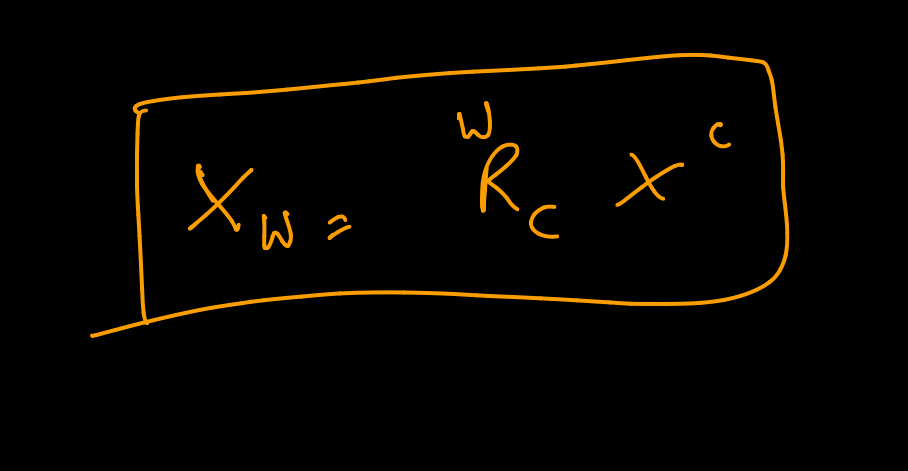

Thus all the point clouds are registered. The first 3 clouds registered are as follows:

OpenCV's implementation (3 registered):
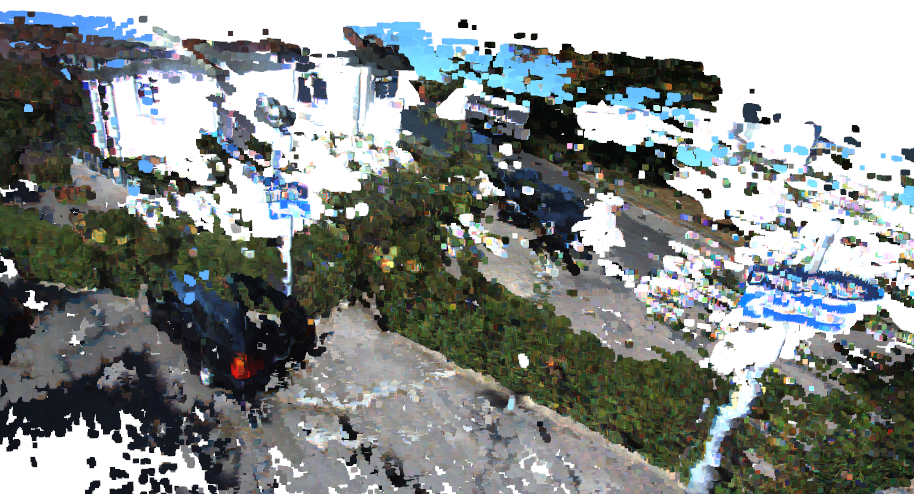
Custom implementation (3 registered):
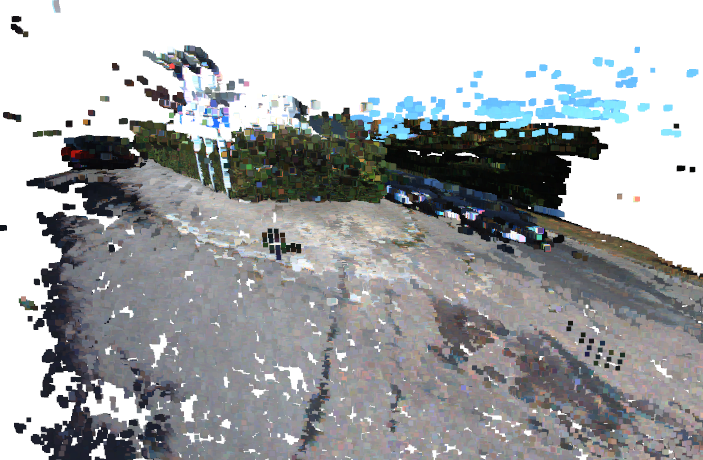